This notebook contains experiments for:

* Loss functions
* Learning rate decay
* Weight initialization
* Optimizers
* Dropout

# `lincoln` imports

In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import lincoln
from lincoln.layers import Dense
from lincoln.losses import SoftmaxCrossEntropy, MeanSquaredError
from lincoln.optimizers import Optimizer, SGD, SGDMomentum
from lincoln.activations import Sigmoid, Tanh, Linear, ReLU
from lincoln.network import NeuralNetwork
from lincoln.train import Trainer
from lincoln.utils import mnist
from lincoln.utils.np_utils import softmax

In [4]:
#mnist.init() Use the function once

In [5]:
X_train, y_train, X_test, y_test = mnist.load()

In [6]:
num_labels = len(y_train)
num_labels

60000

In [7]:
# one-hot encode
num_labels = len(y_train)
train_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    train_labels[i][y_train[i]] = 1

num_labels = len(y_test)
test_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    test_labels[i][y_test[i]] = 1

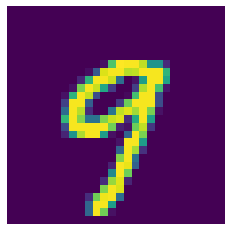

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X_train[45]
some_digit_image = some_digit.reshape(28, 28)
plt.subplot(1, 1, 1)
image = some_digit_image
plt.imshow(image.astype(np.uint8))
plt.axis('off');

# MNIST Demos

# Scale data to mean 0, variance 1

In [9]:
X_train, X_test = X_train - np.mean(X_train), X_test - np.mean(X_train)

In [10]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(-33.318421449829934,
 221.68157855017006,
 -33.318421449829934,
 221.68157855017006)

In [11]:
X_train, X_test = X_train / np.std(X_train), X_test / np.std(X_train) # https://wiki.loginom.ru/articles/data-standartization.html


In [12]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(-0.424073894391566, 2.821543345689335, -0.424073894391566, 2.821543345689335)

In [13]:
def calc_accuracy_model(model, test_set):
    return print(f'''The model validation accuracy is: {np.equal(np.argmax(model.forward(test_set, inference=True), axis=1), y_test).sum() * 100.0 / test_set.shape[0]:.2f}%''')


## Softmax cross entropy

### Trying sigmoid activation

In [14]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(normalize=False), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.611
Validation loss after 20 epochs is 0.426
Validation loss after 30 epochs is 0.388
Validation loss after 40 epochs is 0.374
Validation loss after 50 epochs is 0.365

The model validation accuracy is: 72.77%


Note: even if we normalize the outputs of a classification model with mean squared error loss, it still doesn't help:

In [15]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(normalize=True), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.952

Loss increased after epoch 20, final loss was 0.952, 
using the model from epoch 10
The model validation accuracy is: 41.73%


The reason is that we should be using softmax cross entropy loss!

#### Trying sigmoid activation

In [16]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Sigmoid()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 130,
            eval_every = 1,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

Validation loss after 1 epochs is 1.285
Validation loss after 2 epochs is 0.970
Validation loss after 3 epochs is 0.836
Validation loss after 4 epochs is 0.763
Validation loss after 5 epochs is 0.712
Validation loss after 6 epochs is 0.679
Validation loss after 7 epochs is 0.651
Validation loss after 8 epochs is 0.631
Validation loss after 9 epochs is 0.617
Validation loss after 10 epochs is 0.599
Validation loss after 11 epochs is 0.588
Validation loss after 12 epochs is 0.576
Validation loss after 13 epochs is 0.568
Validation loss after 14 epochs is 0.557
Validation loss after 15 epochs is 0.550
Validation loss after 16 epochs is 0.544
Validation loss after 17 epochs is 0.537
Validation loss after 18 epochs is 0.533
Validation loss after 19 epochs is 0.529
Validation loss after 20 epochs is 0.523
Validation loss after 21 epochs is 0.517
Validation loss after 22 epochs is 0.512
Validation loss after 23 epochs is 0.507

Loss increased after epoch 24, final loss was 0.507, 
using the m

#### Trying ReLU activation

In [17]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=ReLU()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 6.610

Loss increased after epoch 20, final loss was 6.610, 
using the model from epoch 10

The model validation accuracy is: 69.11%


In [18]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.629
Validation loss after 20 epochs is 0.570
Validation loss after 30 epochs is 0.553
Validation loss after 40 epochs is 0.549

Loss increased after epoch 50, final loss was 0.549, 
using the model from epoch 40

The model validation accuracy is: 90.92%


## SGD Momentum

In [19]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Sigmoid()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optim = SGDMomentum(0.1, momentum=0.9)

trainer = Trainer(model, optim)
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 1,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

Validation loss after 1 epochs is 0.615
Validation loss after 2 epochs is 0.489
Validation loss after 3 epochs is 0.447

Loss increased after epoch 4, final loss was 0.447, 
using the model from epoch 3
The model validation accuracy is: 92.35%


In [20]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optim = SGD(0.1)

optim = SGDMomentum(0.1, momentum=0.9)

trainer = Trainer(model, optim)
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.388
Validation loss after 20 epochs is 0.351
Validation loss after 30 epochs is 0.322
Validation loss after 40 epochs is 0.313

Loss increased after epoch 50, final loss was 0.313, 
using the model from epoch 40
The model validation accuracy is: 95.63%


## Different weight decay

In [21]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optimizer = SGDMomentum(lr=0.15, momentum=0.9, final_lr = 0.05, decay_type='linear')

trainer = Trainer(model, optimizer)
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.405
Validation loss after 20 epochs is 0.309
Validation loss after 30 epochs is 0.276

Loss increased after epoch 40, final loss was 0.276, 
using the model from epoch 30
The model validation accuracy is: 95.99%


In [22]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optimizer = SGDMomentum(lr=0.2, 
                        momentum=0.9, 
                        final_lr = 0.05, 
                        decay_type='exponential')

trainer = Trainer(model, optimizer)
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.518
Validation loss after 20 epochs is 0.330
Validation loss after 30 epochs is 0.294

Loss increased after epoch 40, final loss was 0.294, 
using the model from epoch 30
The model validation accuracy is: 95.91%


## Changing weight init

In [23]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optimizer = SGDMomentum(lr=0.15, momentum=0.9, final_lr = 0.05, decay_type='linear')

trainer = Trainer(model, optimizer)
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.350
Validation loss after 20 epochs is 0.249
Validation loss after 30 epochs is 0.241

Loss increased after epoch 40, final loss was 0.241, 
using the model from epoch 30
The model validation accuracy is: 96.89%


In [24]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.363
Validation loss after 20 epochs is 0.266
Validation loss after 30 epochs is 0.243

Loss increased after epoch 40, final loss was 0.243, 
using the model from epoch 30
The model validation accuracy is: 96.44%


## Dropout

In [25]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.283
Validation loss after 20 epochs is 0.243
Validation loss after 30 epochs is 0.207
Validation loss after 40 epochs is 0.183

Loss increased after epoch 50, final loss was 0.183, 
using the model from epoch 40
The model validation accuracy is: 97.04%


## Deep Learning, with and without Dropout

In [26]:
model = NeuralNetwork(
    layers=[Dense(neurons=178, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=46, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 100,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.330
Validation loss after 20 epochs is 0.284
Validation loss after 30 epochs is 0.256
Validation loss after 40 epochs is 0.230
Validation loss after 50 epochs is 0.213
Validation loss after 60 epochs is 0.212
Validation loss after 70 epochs is 0.193
Validation loss after 80 epochs is 0.181

Loss increased after epoch 90, final loss was 0.181, 
using the model from epoch 80
The model validation accuracy is: 97.23%


In [27]:
model = NeuralNetwork(
    layers=[Dense(neurons=178, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=46, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 100,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.423
Validation loss after 20 epochs is 0.384
Validation loss after 30 epochs is 0.306
Validation loss after 40 epochs is 0.292
Validation loss after 50 epochs is 0.279
Validation loss after 60 epochs is 0.252
Validation loss after 70 epochs is 0.252

Loss increased after epoch 80, final loss was 0.252, 
using the model from epoch 70
The model validation accuracy is: 96.17%
